In [2]:
!pip install -U scikit-fuzzy

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
temperatura = ctrl.Antecedent(np.arange(-20, 51, 1), 'temperatura')
umidade_ar = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade_ar')
umidade_solo = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade_solo')
nivel_agua = ctrl.Antecedent(np.arange(0, 101, 1), 'nivel_agua')
sistema = ctrl.Consequent(np.arange(12, 36, 1), 'sistema')

sistema.defuzzify_method = 'centroid'

In [5]:
temperatura['muito baixa'] = fuzz.trapmf(temperatura.universe, [-20, -20, -5, 0])
temperatura['baixa'] = fuzz.trimf(temperatura.universe, [-5,10,18])
temperatura['média'] = fuzz.trapmf(temperatura.universe, [15,20,25,28])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [25,28,39])
temperatura['muito alta'] = fuzz.trapmf(temperatura.universe, [39,45,50,50])

umidade_ar['baixa'] = fuzz.trimf(umidade_ar.universe, [0, 0, 30])
umidade_ar['média'] = fuzz.trapmf(umidade_ar.universe, [25, 50, 80, 100])
umidade_ar['alta'] = fuzz.trimf(umidade_ar.universe, [80, 100, 100])

umidade_solo['baixa'] = fuzz.trimf(umidade_solo.universe, [0, 0, 30])
umidade_solo['média'] = fuzz.trapmf(umidade_solo.universe, [25, 50, 80, 100])
umidade_solo['alta'] = fuzz.trimf(umidade_solo.universe, [80, 100, 100])

nivel_agua['baixa'] = fuzz.trapmf(nivel_agua.universe, [0, 0, 30, 40])
nivel_agua['regular'] = fuzz.trimf(nivel_agua.universe, [28, 50, 72])
nivel_agua['alta'] = fuzz.trapmf(nivel_agua.universe, [60, 80, 100, 100])

sistema['resfriar2'] = fuzz.trimf(sistema.universe, [12, 12, 17])
sistema['resfriar1'] = fuzz.trimf(sistema.universe, [15, 18, 20])
sistema['desligar'] = fuzz.trimf(sistema.universe, [19, 22, 25])
sistema['aquecer1'] = fuzz.trimf(sistema.universe, [22, 25, 27])
sistema['aquecer2'] = fuzz.trapmf(sistema.universe, [25, 30, 35, 35])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


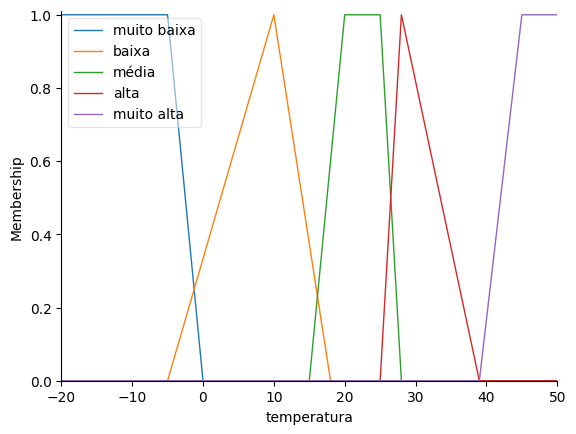

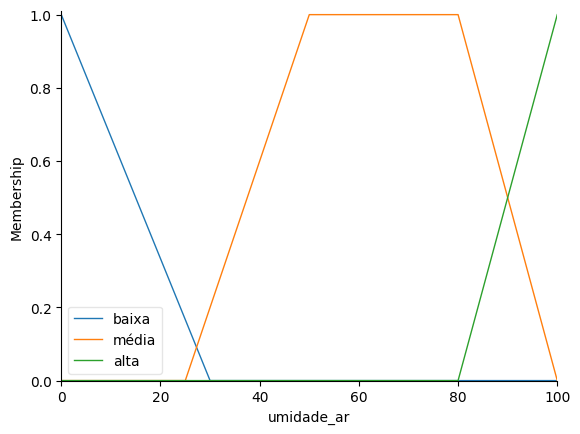

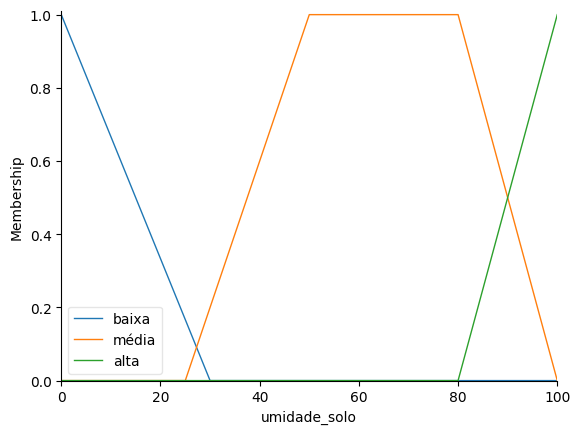

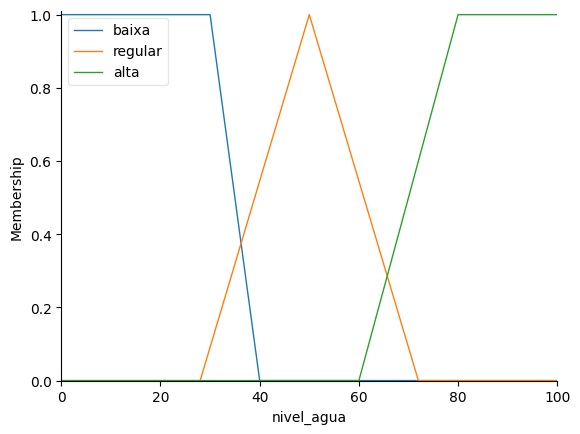

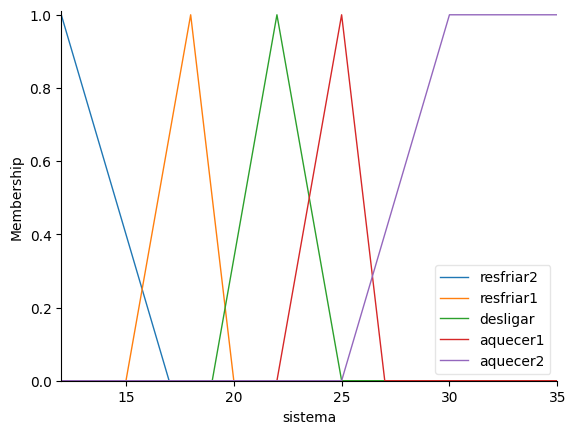

In [6]:
temperatura.view()
umidade_ar.view()
umidade_solo.view()
nivel_agua.view()
sistema.view()

In [7]:
#Regras podem ser criadas conforme o plantio, pode ser especificada e modificadas conforme a necessidade
#Rules can be established according to the planting, and they can be specified and modified as needed.
rule1 = ctrl.Rule(temperatura['muito baixa'], sistema['aquecer2'])
rule2 = ctrl.Rule(temperatura['muito alta'] | (temperatura['alta'] & umidade_ar['alta']), sistema['resfriar2'])
rule3 = ctrl.Rule((temperatura['média'] & umidade_ar['média']) | umidade_ar['baixa'], sistema['desligar'])
rule4 = ctrl.Rule(temperatura['baixa'] & (umidade_ar['média'] | umidade_ar['alta']), sistema['aquecer1'])
rule5 = ctrl.Rule(temperatura['alta'], sistema['resfriar1'])


In [8]:
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)

In [9]:
VALOR_TEMPERATURA = 35
VALOR_UMIDADE_AR = 20
VALOR_UMIDADE_SOLO = 20
VALOR_NIVEL_AGUA = 50

simulador.input['temperatura'] = VALOR_TEMPERATURA
simulador.input['umidade_ar'] = VALOR_UMIDADE_AR


simulador.compute()
RESULTADO = simulador.output['sistema']
print("Resultado numérico: ", RESULTADO)

Resultado numérico:  19.924638498408992


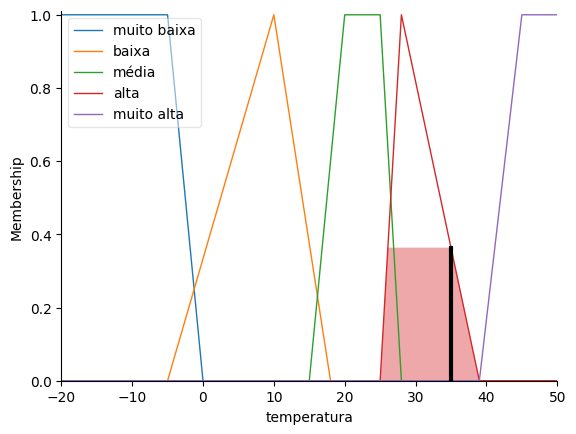

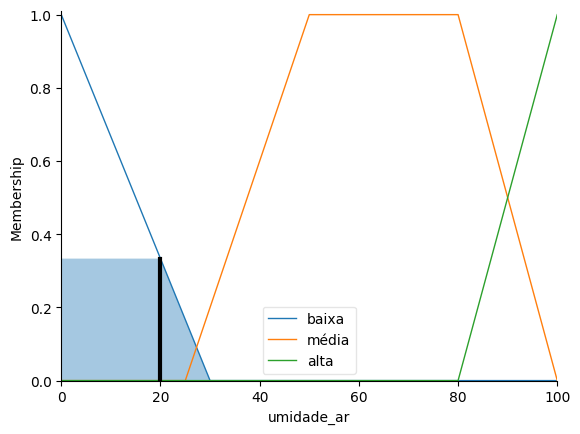

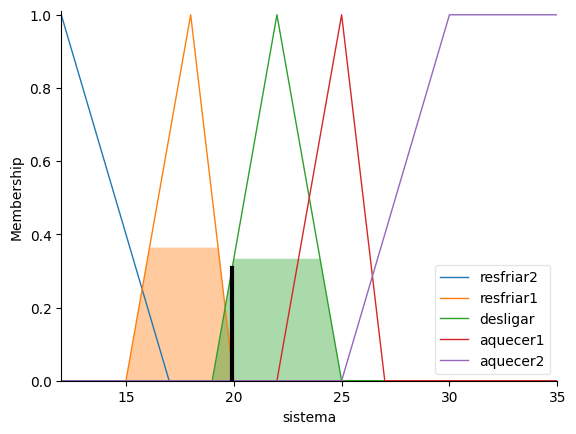

In [10]:
temperatura.view(sim=simulador)
umidade_ar.view(sim=simulador)
sistema.view(sim=simulador)

In [11]:
print("\nPertinência de Temperatura ")
print("Pertinência temperatura MUITO ALTA: \t" + str(fuzz.interp_membership(temperatura.universe, temperatura['muito alta'].mf, VALOR_TEMPERATURA)))
print("Pertinência temperatura ALTA: \t" + str(fuzz.interp_membership(temperatura.universe, temperatura['alta'].mf, VALOR_TEMPERATURA)))
print("Pertinência temperatura MÉDIA: \t" + str(fuzz.interp_membership(temperatura.universe, temperatura['média'].mf, VALOR_TEMPERATURA)))
print("Pertinência temperatura BAIXA: \t" + str(fuzz.interp_membership(temperatura.universe, temperatura['baixa'].mf, VALOR_TEMPERATURA)))
print("Pertinência temperatura MUITO BAIXA: \t" + str(fuzz.interp_membership(temperatura.universe, temperatura['muito baixa'].mf, VALOR_TEMPERATURA)))

print("\nPertinência de Umidade do ar ")
print("Pertinência Umidade do ar ALTA: \t" + str(fuzz.interp_membership(umidade_ar.universe, umidade_ar['alta'].mf, VALOR_UMIDADE_AR)))
print("Pertinência Umidade do ar MÉDIA: \t" + str(fuzz.interp_membership(umidade_ar.universe, umidade_ar['média'].mf, VALOR_UMIDADE_AR)))
print("Pertinência Umidade do ar BAIXA: \t" + str(fuzz.interp_membership(umidade_ar.universe, umidade_ar['baixa'].mf, VALOR_UMIDADE_AR)))

print("\nPertinência do Sistema")
print("Pertinência Sistema resfriar2\t" + str(fuzz.interp_membership(sistema.universe, sistema['resfriar2'].mf, RESULTADO)))
print("Pertinência Sistema resfriar1\t" + str(fuzz.interp_membership(sistema.universe, sistema['resfriar1'].mf, RESULTADO)))
print("Pertinência Sistema desligar\t" + str(fuzz.interp_membership(sistema.universe, sistema['desligar'].mf, RESULTADO)))
print("Pertinência Sistema aquecer1\t" + str(fuzz.interp_membership(sistema.universe, sistema['aquecer1'].mf, RESULTADO)))
print("Pertinência Sistema aquecer2\t" + str(fuzz.interp_membership(sistema.universe, sistema['aquecer2'].mf, RESULTADO)))


Pertinência de Temperatura 
Pertinência temperatura MUITO ALTA: 	0.0
Pertinência temperatura ALTA: 	0.36363636363636365
Pertinência temperatura MÉDIA: 	0.0
Pertinência temperatura BAIXA: 	0.0
Pertinência temperatura MUITO BAIXA: 	0.0

Pertinência de Umidade do ar 
Pertinência Umidade do ar ALTA: 	0.0
Pertinência Umidade do ar MÉDIA: 	0.0
Pertinência Umidade do ar BAIXA: 	0.3333333333333333

Pertinência do Sistema
Pertinência Sistema resfriar2	0.0
Pertinência Sistema resfriar1	0.037680750795503926
Pertinência Sistema desligar	0.3082128328029974
Pertinência Sistema aquecer1	0.0
Pertinência Sistema aquecer2	0.0


In [12]:
#caso o cliente queira otmizar ainda mais o sistema
aquecer = float(fuzz.interp_membership(sistema.universe, sistema['aquecer1'].mf, RESULTADO)) + float(fuzz.interp_membership(sistema.universe, sistema['aquecer2'].mf, RESULTADO))
resfriar = float(fuzz.interp_membership(sistema.universe, sistema['resfriar1'].mf, RESULTADO)) + float(fuzz.interp_membership(sistema.universe, sistema['resfriar2'].mf, RESULTADO))
baixa = float(fuzz.interp_membership(nivel_agua.universe, nivel_agua['baixa'].mf, VALOR_NIVEL_AGUA))
regular = float(fuzz.interp_membership(nivel_agua.universe, nivel_agua['regular'].mf, VALOR_NIVEL_AGUA))
alta = float(fuzz.interp_membership(nivel_agua.universe, nivel_agua['alta'].mf, VALOR_NIVEL_AGUA))
if (baixa > regular) & (baixa > alta) :
  if aquecer > resfriar:
    sistema.defuzzify_method = 'som'
    print('baixa min das max')
  if resfriar > aquecer:
    sistema.defuzzify_method = 'lom'
    print('baixa max das max')
elif (regular > baixa) & (regular > alta):
    sistema.defuzzify_method = 'mom'
    print('regular media')
elif (alta > baixa) & (alta > baixa):
  if aquecer > resfriar:
    sistema.defuzzify_method = 'lom'
    print('alta max das max')
  if resfriar > aquecer:
    sistema.defuzzify_method = 'som'
    print('alta min das max')


regular media


Resultado numérico:  18.0


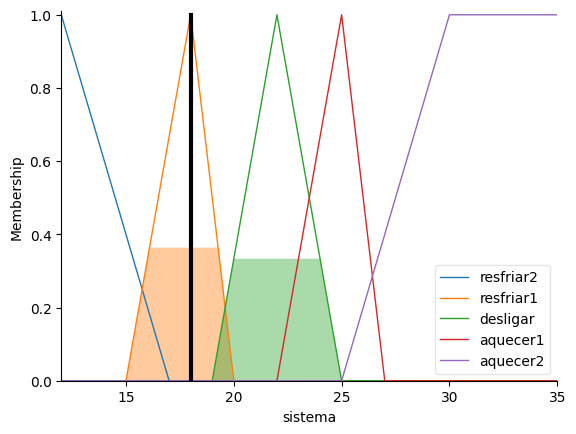

In [13]:
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)

simulador.input['temperatura'] = VALOR_TEMPERATURA
simulador.input['umidade_ar'] = VALOR_UMIDADE_AR

simulador.compute()
RESULTADO = simulador.output['sistema']
print("Resultado numérico: ", RESULTADO)

sistema.view(sim=simulador)